# Set 2 - incomplete

In [99]:
import tifffile  # to load tiff files efficiently
import matplotlib.pyplot as plt
import cv2 # Open-CV for selecting a ROI
import itertools #to flatten a list of list
import numpy as np

tifstack1 = tifffile.imread("AndorImages\\Set2\\MOTStabilityCheck.tif")
tifstack2 = tifffile.imread("AndorImages\\Set2\\MOTStabilityCheck_X2.tif")
tifstack3 = tifffile.imread("AndorImages\\Set2\\MOTStabilityCheck_X3.tif")
tifstack4 = tifffile.imread("AndorImages\\Set2\\MOTStabilityCheck_X4.tif")
tifstack5 = tifffile.imread("AndorImages\\Set2\\MOTStabilityCheck_X5.tif")
tifstack6 = tifffile.imread("AndorImages\\Set2\\MOTStabilityCheck_X6.tif")

tifstackList = [tifstack1, tifstack2, tifstack3, tifstack4, tifstack5, tifstack6]
tifstack = list(itertools.chain(*tifstackList)) ### Flattening tifstackList

###  Show some images

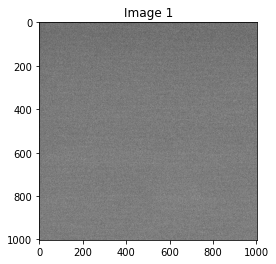

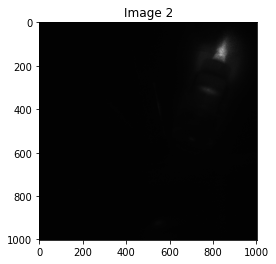

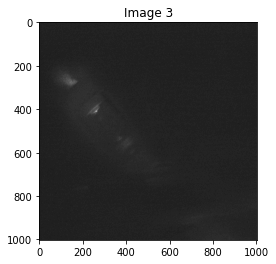

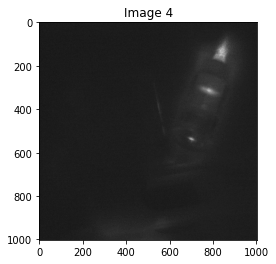

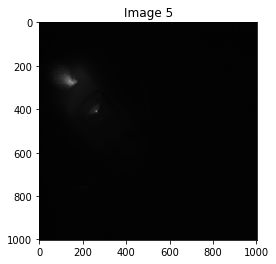

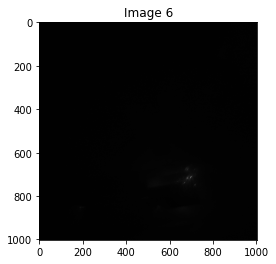

In [100]:
for i in range(0, 6):
    image = tifstack1[i]
    plt.imshow(image, cmap='gray')
    plt.title(f"Image {i+1}")
    plt.show()

### Background fluctuation

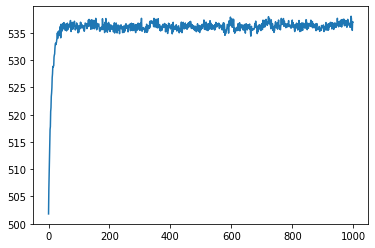

In [101]:
bkg_list = []

for i in range(0, len(tifstack), 6):
    img = tifstack[i]
    Total = sum(element for sublist in img for element in sublist) ### adds elements of a 2D list
    bkg_list.append(Total)
    
n_pixels = len(img)*len(img[0])
ave_bkg_list = [x / n_pixels for x in bkg_list] ### Dividing all the elements by a number

plt.plot(ave_bkg_list)
plt.show()

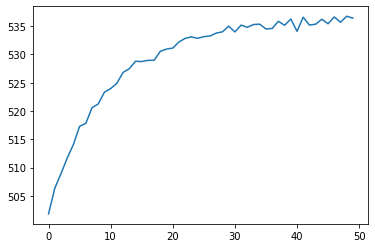

In [102]:
plt.plot(ave_bkg_list[0:50])
plt.show()

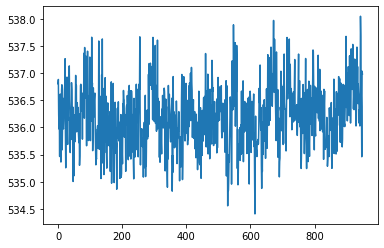

In [103]:
plt.plot(ave_bkg_list[50::])
plt.show()

## Without ROI

In [ ]:
n_AOM = 1
Pvst = []

for i in range(n_AOM, len(tifstack), 6):
    img = np.array(tifstack[i])
    Total = np.sum(img)
    Pvst.append(Total)
    
n_pixels = len(img)*len(img[0])
ave_Pvst = [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

plt.plot(ave_Pvst[50::])
plt.show()

In [ ]:
n_AOM = 2
Pvst = []

for i in range(n_AOM, len(tifstack), 6):
    img = np.array(tifstack[i])
    Total = np.sum(img)
    Pvst.append(Total)
    
n_pixels = len(img)*len(img[0])
ave_Pvst = [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

plt.plot(ave_Pvst[50::])
plt.show()

In [ ]:
n_AOM = 3
Pvst = []

for i in range(n_AOM, len(tifstack), 6):
    img = np.array(tifstack[i])
    Total = np.sum(img)
    Pvst.append(Total)
    
n_pixels = len(img)*len(img[0])
ave_Pvst = [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

plt.plot(ave_Pvst[50::])
plt.show()

In [ ]:
n_AOM = 4
Pvst = []

for i in range(n_AOM, len(tifstack), 6):
    img = np.array(tifstack[i])
    Total = np.sum(img)
    Pvst.append(Total)
    
n_pixels = len(img)*len(img[0])
ave_Pvst = [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

plt.plot(ave_Pvst[50::])
plt.show()

In [ ]:
n_AOM = 5
Pvst = []

for i in range(n_AOM, len(tifstack), 6):
    img = np.array(tifstack[i])
    Total = np.sum(img)
    Pvst.append(Total)
    
n_pixels = len(img)*len(img[0])
ave_Pvst = [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

plt.plot(ave_Pvst[50::])
plt.show()

## With a small ROI

### Select a ROI

In [ ]:
"""
for AOM_A1 (i.e. tifstack[1, 1+7, 1+14, ... ]), ROI that covers the bright area only:
x1, x2 = 800, 880
y1, y2 = 75, 185


for AOM_A2 (i.e. tifstack[2, 2+7, 2+14, ... ]), ROI that covers the bright area only:
x1, x2 = 75, 185
y1, y2 = 225, 315


for AOM_A3 (i.e. tifstack[3, 3+7, 3+14, ... ]), ROI that covers the bright area only:
x1, x2 = 800, 880
y1, y2 = 75, 195


for AOM_A4 (i.e. tifstack[4, 4+7, 4+14, ... ]), ROI that covers the bright area only:
x1, x2 = 75, 185
y1, y2 = 225, 315


for AOM_A6 (i.e. tifstack[5, 5+7, 5+14, ... ]), ROI that covers the bright area only:
x1, x2 = 693, 705
y1, y2 = 708, 720

"""

# Specify the ROI
x1, x2 = 800, 880
y1, y2 = 75, 185


img = tifstack1[3]
crp_img = img[y1:y2, x1:x2]
plt.imshow(crp_img, cmap='gray')


### AOM1 light over time

In [ ]:
n_AOM = 1
x1, x2 = 800, 880
y1, y2 = 75, 185

Pvst = []

for i in range(n_AOM, len(tifstack), 6):
    img = tifstack[i]
    crp_img = img[y1:y2, x1:x2]
    Total = sum(element for sublist in crp_img for element in sublist) ### adds elements of a 2D list
    Pvst.append(Total)
    
n_pixels = len(crp_img)*len(crp_img[0])
ave_Pvst= [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

dev = 200 * (max(ave_Pvst)-min(ave_Pvst)) / (max(ave_Pvst)+min(ave_Pvst))
print("Power fluctuation (%): ", dev)

plt.plot(ave_Pvst[50::])
plt.show()

# ### Maximum of a 2D list:
# max_value = max(max(row) for row in crp_img)
# print(max_value)


### AOM2 light over time

In [ ]:
n_AOM = 2
x1, x2 = 75, 185
y1, y2 = 225, 315

Pvst = []

for i in range(n_AOM, len(tifstack), 6):
    img = tifstack[i]
    crp_img = img[y1:y2, x1:x2]
    Total = sum(element for sublist in crp_img for element in sublist) ### adds elements of a 2D list
    Pvst.append(Total)
    
n_pixels = len(crp_img)*len(crp_img[0])
ave_Pvst = [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

dev = 200 * (max(ave_Pvst)-min(ave_Pvst)) / (max(ave_Pvst)+min(ave_Pvst))
print("Power fluctuation (%): ", dev)

plt.plot(ave_Pvst[50::])
plt.show()

### AOM3 over time

In [ ]:
n_AOM = 3
x1, x2 = 800, 880
y1, y2 = 75, 195

Pvst = []

for i in range(n_AOM, len(tifstack), 6):
    img = tifstack[i]
    crp_img = img[y1:y2, x1:x2]
    Total = sum(element for sublist in crp_img for element in sublist) ### adds elements of a 2D list
    Pvst.append(Total)
    
n_pixels = len(crp_img)*len(crp_img[0])
ave_Pvst = [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

dev = 200 * (max(ave_Pvst)-min(ave_Pvst)) / (max(ave_Pvst)+min(ave_Pvst))
print("Power fluctuation (%): ", dev)

plt.plot(ave_Pvst[50::])
plt.show()

### AOM4 over time

In [ ]:
n_AOM = 4
x1, x2 = 75, 185
y1, y2 = 225, 315

Pvst = []

for i in range(4, len(tifstack), 6):
    img = tifstack[i]
    crp_img = img[y1:y2, x1:x2]
    Total = sum(element for sublist in crp_img for element in sublist) ### adds elements of a 2D list
    Pvst.append(Total)
    
n_pixels = len(crp_img)*len(crp_img[0])
ave_Pvst = [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

dev = 200 * (max(ave_Pvst)-min(ave_Pvst)) / (max(ave_Pvst)+min(ave_Pvst))
print("Power fluctuation (%): ", dev)

plt.plot(ave_Pvst[50::])
plt.show()

### AOM6 over time

In [ ]:
n_AOM = 5
x1, x2 = 693, 705
y1, y2 = 708, 720

Pvst = []

for i in range(n_AOM, len(tifstack), 6):
    img = tifstack[i]
    crp_img = img[y1:y2, x1:x2]
    Total = sum(element for sublist in crp_img for element in sublist) ### adds elements of a 2D list
    Pvst.append(Total)
    
n_pixels = len(crp_img)*len(crp_img[0])
ave_Pvst = [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

dev = 200 * (max(ave_Pvst)-min(ave_Pvst)) / (max(ave_Pvst)+min(ave_Pvst))
print("Power fluctuation (%): ", dev)

plt.plot(ave_Pvst[50::])
plt.show()

## A few pixels as ROI

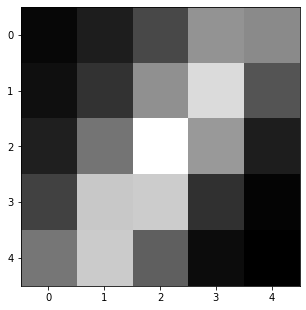

In [104]:
"""
for AOM_A1 (i.e. tifstack[1, 1+7, 1+14, ... ]), ROI that covers the bright area only:
x1, x2 = 830, 850
y1, y2 = 125, 140


for AOM_A2 (i.e. tifstack[2, 2+7, 2+14, ... ]), ROI that covers the bright area only:
x1, x2 = 260, 268
y1, y2 = 407, 413


for AOM_A3 (i.e. tifstack[3, 3+7, 3+14, ... ]), ROI that covers the bright area only:
x1, x2 = 830, 845
y1, y2 = 130, 140


for AOM_A4 (i.e. tifstack[4, 4+7, 4+14, ... ]), ROI that covers the bright area only:
x1, x2 = 135, 150
y1, y2 = 265, 285


for AOM_A6 (i.e. tifstack[5, 5+7, 5+14, ... ]), ROI that covers the bright area only:
x1, x2 = 697, 702
y1, y2 = 710, 715

"""


# Specify the ROI
x1, x2 = 697, 702
y1, y2 = 710, 715


img = tifstack1[5]
crp_img = img[y1:y2, x1:x2]
plt.figure(figsize = (5,10))
plt.imshow(crp_img, cmap='gray')

Power fluctuation (%):  9.98271114044656


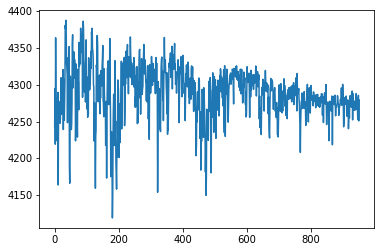

In [105]:
n_AOM = 1
Pvst = []

x1, x2 = 830, 850
y1, y2 = 125, 140

for i in range(n_AOM, len(tifstack), 6):
    img = np.array(tifstack[i][y1:y2, x1:x2])
    Total = np.sum(img)
    Pvst.append(Total)
    
n_pixels = len(img)*len(img[0])
ave_Pvst = [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

dev = 200 * (max(ave_Pvst)-min(ave_Pvst)) / (max(ave_Pvst)+min(ave_Pvst))
print("Power fluctuation (%): ", dev)

plt.plot(ave_Pvst[50::])
plt.show()

Power fluctuation (%):  5.604528684484754


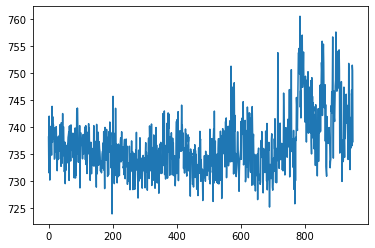

In [106]:
n_AOM = 2
Pvst = []

x1, x2 = 260, 268
y1, y2 = 407, 413

for i in range(n_AOM, len(tifstack), 6):
    img = np.array(tifstack[i][y1:y2, x1:x2])
    Total = np.sum(img)
    Pvst.append(Total)
    
n_pixels = len(img)*len(img[0])
ave_Pvst = [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

dev = 200 * (max(ave_Pvst)-min(ave_Pvst)) / (max(ave_Pvst)+min(ave_Pvst))
print("Power fluctuation (%): ", dev)

plt.plot(ave_Pvst[50::])
plt.show()

Power fluctuation (%):  5.983033417057565


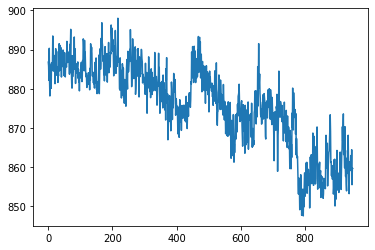

In [107]:
n_AOM = 3
Pvst = []

x1, x2 = 830, 845
y1, y2 = 130, 140

for i in range(n_AOM, len(tifstack), 6):
    img = np.array(tifstack[i][y1:y2, x1:x2])
    Total = np.sum(img)
    Pvst.append(Total)
    
n_pixels = len(img)*len(img[0])
ave_Pvst = [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

dev = 200 * (max(ave_Pvst)-min(ave_Pvst)) / (max(ave_Pvst)+min(ave_Pvst))
print("Power fluctuation (%): ", dev)

plt.plot(ave_Pvst[50::])
plt.show()

Power fluctuation (%):  14.056940388092576


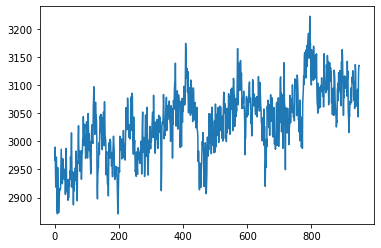

In [108]:
n_AOM = 4
Pvst = []

x1, x2 = 135, 150
y1, y2 = 265, 285

for i in range(n_AOM, len(tifstack), 6):
    img = np.array(tifstack[i][y1:y2, x1:x2])
    Total = np.sum(img)
    Pvst.append(Total)
    
n_pixels = len(img)*len(img[0])
ave_Pvst = [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

dev = 200 * (max(ave_Pvst)-min(ave_Pvst)) / (max(ave_Pvst)+min(ave_Pvst))
print("Power fluctuation (%): ", dev)

plt.plot(ave_Pvst[50::])
plt.show()

Power fluctuation (%):  34.4610081659212


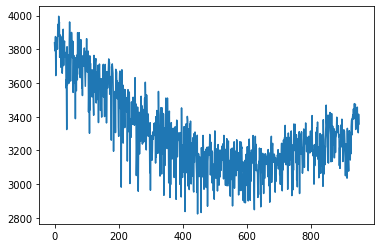

In [109]:
n_AOM = 5
Pvst = []

x1, x2 = 697, 702
y1, y2 = 710, 715

for i in range(n_AOM, len(tifstack), 6):
    img = np.array(tifstack[i][y1:y2, x1:x2])
    Total = np.sum(img)
    Pvst.append(Total)
    
n_pixels = len(img)*len(img[0])
ave_Pvst = [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

dev = 200 * (max(ave_Pvst)-min(ave_Pvst)) / (max(ave_Pvst)+min(ave_Pvst))
print("Power fluctuation (%): ", dev)

plt.plot(ave_Pvst[50::])
plt.show()

# Set 3 - with cooling PD and TA power fluctuation

In [92]:
import tifffile  # to load tiff files efficiently
import matplotlib.pyplot as plt
import cv2 # Open-CV for selecting a ROI
import itertools #to flatten a list of list
import numpy as np

base_path = "AndorImages\\Set3\\MOTStabilityCheck_1"
n_files = 29 

tifstackList = []

for i in range(1, n_files+1):
    file_name = f"{base_path}_X{i}.tif"
    tifstackList.append(tifffile.imread(file_name))

tifstack = list(itertools.chain(*tifstackList))


### show some images

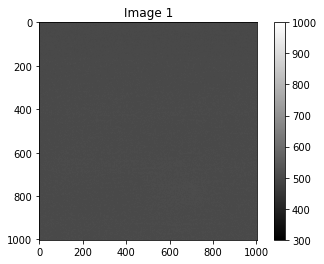

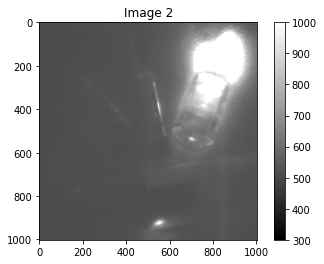

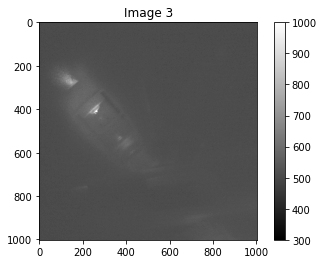

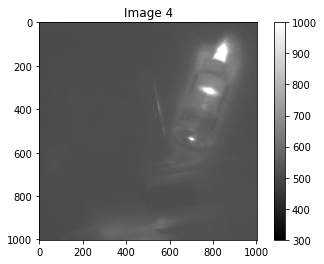

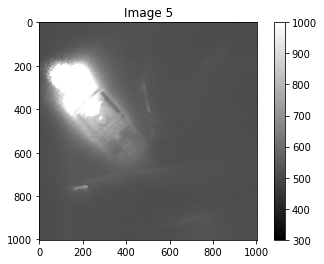

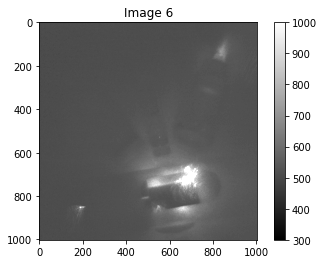

In [93]:
for i in range(0, 6):
    image = tifstack[i]
    plt.imshow(image, vmin = 300, vmax = 1000, cmap='gray')
    plt.title(f"Image {i+1}")
    plt.colorbar()
    plt.show()

### Background fluctuation

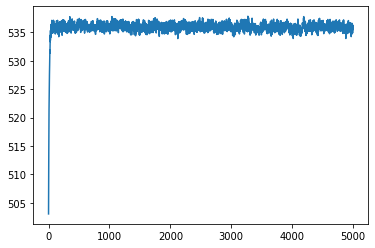

In [3]:
bkg_list = []

for i in range(0, len(tifstack), 6):
    img = np.array(tifstack[i])
    Total = np.sum(img)
    bkg_list.append(Total)
    
n_pixels = len(img)*len(img[0])
ave_bkg_list = [x / n_pixels for x in bkg_list] ### Dividing all the elements by a number

plt.plot(ave_bkg_list)
plt.show()

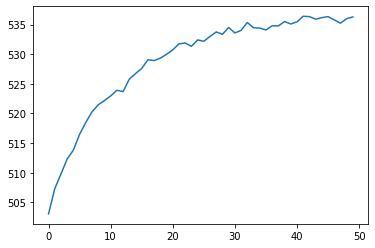

In [4]:
plt.plot(ave_bkg_list[0:50])
plt.show()

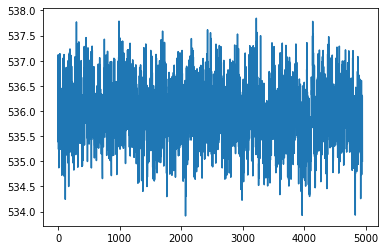

In [6]:
plt.plot(ave_bkg_list[50::])
plt.show()

In [7]:
ave_Pvst = ave_bkg_list[50::]
dev = 200 * (max(ave_Pvst)-min(ave_Pvst)) / (max(ave_Pvst)+min(ave_Pvst))
print("Power fluctuation (%): ", dev)

Power fluctuation (%):  0.7331968613281377


## A few pixels as ROI

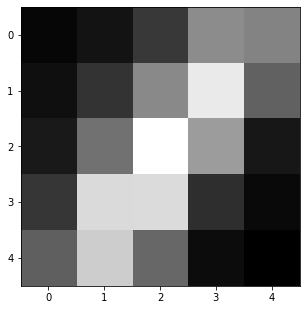

In [9]:
"""
for AOM_A1 (i.e. tifstack[1, 1+7, 1+14, ... ]), ROI that covers the bright area only:
x1, x2 = 830, 850
y1, y2 = 125, 140


for AOM_A2 (i.e. tifstack[2, 2+7, 2+14, ... ]), ROI that covers the bright area only:
x1, x2 = 260, 268
y1, y2 = 407, 413


for AOM_A3 (i.e. tifstack[3, 3+7, 3+14, ... ]), ROI that covers the bright area only:
x1, x2 = 830, 845
y1, y2 = 130, 140


for AOM_A4 (i.e. tifstack[4, 4+7, 4+14, ... ]), ROI that covers the bright area only:
x1, x2 = 135, 150
y1, y2 = 265, 285


for AOM_A6 (i.e. tifstack[5, 5+7, 5+14, ... ]), ROI that covers the bright area only:
x1, x2 = 697, 702
y1, y2 = 710, 715

"""


# Specify the ROI
x1, x2 = 697, 702
y1, y2 = 710, 715


img = tifstack[5]
crp_img = img[y1:y2, x1:x2]
plt.figure(figsize = (5,10))
plt.imshow(crp_img, cmap='gray')

Power fluctuation (%):  5.196728014186144


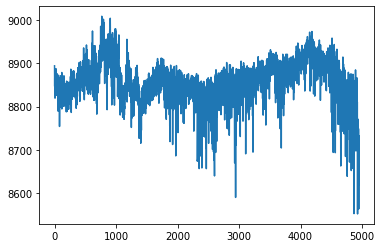

In [10]:
n_AOM = 1
Pvst = []

x1, x2 = 830, 850
y1, y2 = 125, 140

for i in range(n_AOM, len(tifstack), 6):
    img = np.array(tifstack[i][y1:y2, x1:x2])
    Total = np.sum(img)
    Pvst.append(Total)
    
n_pixels = len(img)*len(img[0])
ave_Pvst = [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

dev = 200 * (max(ave_Pvst)-min(ave_Pvst)) / (max(ave_Pvst)+min(ave_Pvst))
print("Power fluctuation (%): ", dev)

plt.plot(ave_Pvst[50::])
plt.show()

Power fluctuation (%):  14.258655367010984


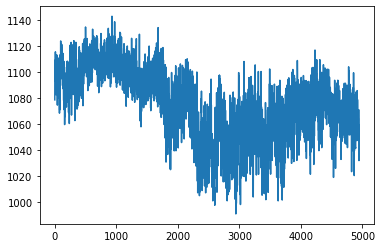

In [11]:
n_AOM = 2
Pvst = []

x1, x2 = 260, 268
y1, y2 = 407, 413

for i in range(n_AOM, len(tifstack), 6):
    img = np.array(tifstack[i][y1:y2, x1:x2])
    Total = np.sum(img)
    Pvst.append(Total)
    
n_pixels = len(img)*len(img[0])
ave_Pvst = [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

dev = 200 * (max(ave_Pvst)-min(ave_Pvst)) / (max(ave_Pvst)+min(ave_Pvst))
print("Power fluctuation (%): ", dev)

plt.plot(ave_Pvst[50::])
plt.show()

Power fluctuation (%):  10.019286734358353


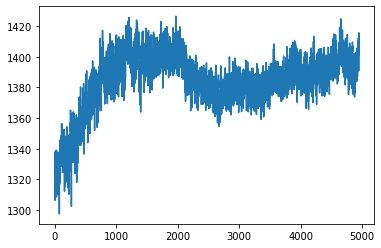

In [12]:
n_AOM = 3
Pvst = []

x1, x2 = 830, 845
y1, y2 = 130, 140

for i in range(n_AOM, len(tifstack), 6):
    img = np.array(tifstack[i][y1:y2, x1:x2])
    Total = np.sum(img)
    Pvst.append(Total)
    
n_pixels = len(img)*len(img[0])
ave_Pvst = [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

dev = 200 * (max(ave_Pvst)-min(ave_Pvst)) / (max(ave_Pvst)+min(ave_Pvst))
print("Power fluctuation (%): ", dev)

plt.plot(ave_Pvst[50::])
plt.show()

Power fluctuation (%):  3.4955485910658837


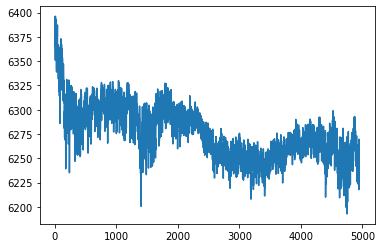

In [13]:
n_AOM = 4
Pvst = []

x1, x2 = 135, 150
y1, y2 = 265, 285

for i in range(n_AOM, len(tifstack), 6):
    img = np.array(tifstack[i][y1:y2, x1:x2])
    Total = np.sum(img)
    Pvst.append(Total)
    
n_pixels = len(img)*len(img[0])
ave_Pvst = [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

dev = 200 * (max(ave_Pvst)-min(ave_Pvst)) / (max(ave_Pvst)+min(ave_Pvst))
print("Power fluctuation (%): ", dev)

plt.plot(ave_Pvst[50::])
plt.show()

Power fluctuation (%):  24.671291965492152


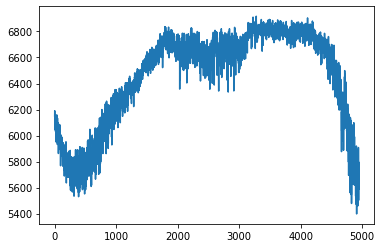

In [14]:
n_AOM = 5
Pvst = []

x1, x2 = 697, 702
y1, y2 = 710, 715

for i in range(n_AOM, len(tifstack), 6):
    img = np.array(tifstack[i][y1:y2, x1:x2])
    Total = np.sum(img)
    Pvst.append(Total)
    
n_pixels = len(img)*len(img[0])
ave_Pvst = [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

dev = 200 * (max(ave_Pvst)-min(ave_Pvst)) / (max(ave_Pvst)+min(ave_Pvst))
print("Power fluctuation (%): ", dev)

plt.plot(ave_Pvst[50::])
plt.show()

## Cooling laser power fluctuation

In [20]:
import csv
datafile = "AndorImages\\Set3\\LaserPower.csv"

has_header = True
with open(datafile, 'r', newline='') as f:
    reader = csv.reader(f)
    if has_header:
        header = reader.__next__()
    data = [row for row in reader]#[:5]
    f.close()

data = np.array(data,float).transpose()
# print(data)
rows,cols = data.shape

cooling_power = data[0]
TA_power = data[1]

Power fluctuation (%):  9.970674486803519


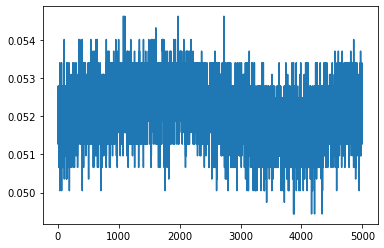

In [39]:
dev = 200 * (max(cooling_power)-min(cooling_power)) / (max(cooling_power)+min(cooling_power))
print("Power fluctuation (%): ", dev)

plt.plot(cooling_power)
plt.show()

Power fluctuation (%):  7.825920977285741


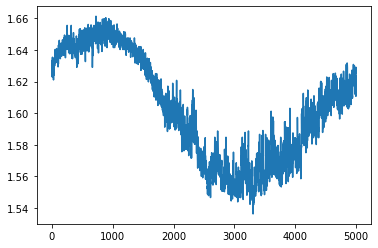

In [34]:
dev = 200 * (max(TA_power)-min(TA_power)) / (max(TA_power)+min(TA_power))
print("Power fluctuation (%): ", dev)

plt.plot(TA_power)
plt.show()

## Fiber splitters power fluctuation

1% tap Power fluctuation (%):  9.37776467118844


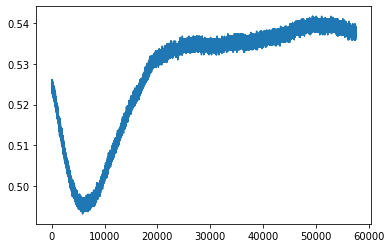

99% tap Power fluctuation (%):  1.0550560962924438


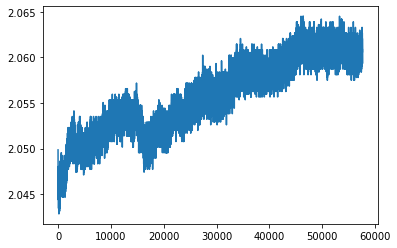

Switchyard Power fluctuation (%):  1.2470555632534295


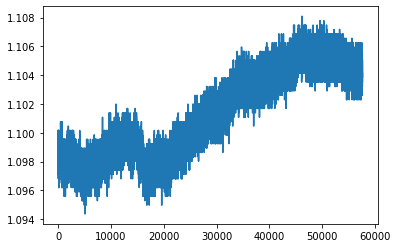

In [95]:
import csv
import matplotlib.pyplot as plt
import numpy as np

datafile = "C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\20230612_143810_LaserPowers.csv"

has_header = True
with open(datafile, 'r', newline='') as f:
    reader = csv.reader(f)
    if has_header:
        header = reader.__next__()
    data = [row for row in reader]#[:5]
    f.close()

data = np.array(data,float).transpose()
# print(data)
rows,cols = data.shape

P1_1percent_cooling = data[0]
P2_99percent_cooling = data[1]
P3_Tbox_cooling = data[2]


Data1 = P1_1percent_cooling
dev = 200 * (max(Data1)-min(Data1)) / (max(Data1)+min(Data1))
print("1% tap Power fluctuation (%): ", dev)
plt.plot(Data1)
plt.show()


Data2 = P2_99percent_cooling
dev = 200 * (max(Data2)-min(Data2)) / (max(Data2)+min(Data2))
print("99% tap Power fluctuation (%): ", dev)
plt.plot(Data2)
plt.show()

Data3 = P3_Tbox_cooling
dev = 200 * (max(Data3)-min(Data3)) / (max(Data3)+min(Data3))
print("Switchyard Power fluctuation (%): ", dev)
plt.plot(Data3)
plt.show()


In [98]:
len(Data1)

57600

# Set4 - with fiber 99:1 splitter and 6th MOT in free space

In [50]:
import tifffile  # to load tiff files efficiently
import matplotlib.pyplot as plt
import cv2 # Open-CV for selecting a ROI
import itertools #to flatten a list of list
import numpy as np

base_path = "AndorImages\\Set4\\MOTStabilityCheck"
n_files = 9 

tifstackList = []

for i in range(1, n_files+1):
    file_name = f"{base_path}_X{i}.tif"
    tifstackList.append(tifffile.imread(file_name))

tifstack = list(itertools.chain(*tifstackList))


## Show some images

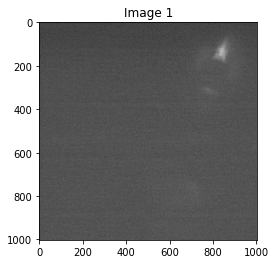

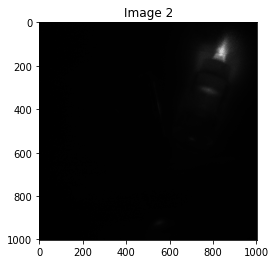

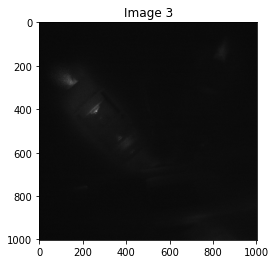

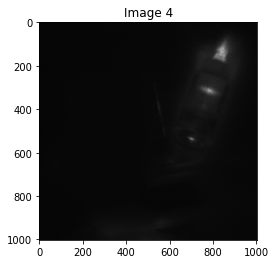

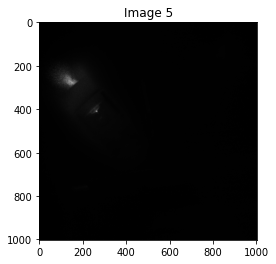

In [53]:
for i in range(0, 5):
    image = tifstack[i]
    plt.imshow(image, cmap='gray')
    plt.title(f"Image {i+1}")
    plt.show()

## background fluctuations

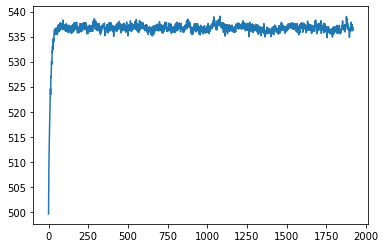

In [54]:
bkg_list = []

for i in range(0, len(tifstack), 5):
    img = np.array(tifstack[i])
    Total = np.sum(img)
    bkg_list.append(Total)
    
n_pixels = len(img)*len(img[0])
ave_bkg_list = [x / n_pixels for x in bkg_list] ### Dividing all the elements by a number

plt.plot(ave_bkg_list)
plt.show()

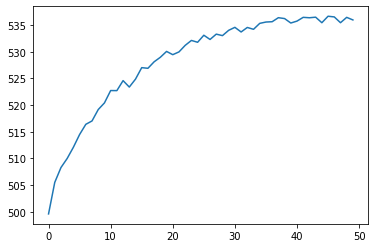

In [55]:
plt.plot(ave_bkg_list[0:50])
plt.show()

In [56]:
ave_Pvst = ave_bkg_list[50::]
dev = 200 * (max(ave_Pvst)-min(ave_Pvst)) / (max(ave_Pvst)+min(ave_Pvst))
print("Power fluctuation (%): ", dev)

Power fluctuation (%):  0.8003466833858434


## A few pixels as ROI

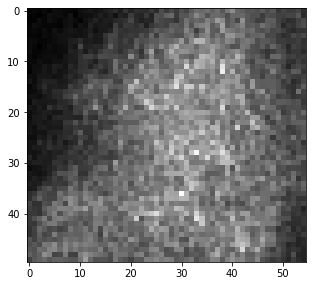

In [63]:
"""
for AOM_A1, ROI that covers the bright area only:
x1, x2 = 830, 850
y1, y2 = 125, 140


for AOM_A2 , ROI that covers the bright area only:
x1, x2 = 260, 268
y1, y2 = 407, 413


for AOM_A3, ROI that covers the bright area only:
x1, x2 = 830, 845
y1, y2 = 130, 140


for AOM_A4, ROI that covers the bright area only:
x1, x2 = 135, 150
y1, y2 = 265, 285


"""


# Specify the ROI
x1, x2 = 830, 845
y1, y2 = 130, 140


img = tifstack[3]
crp_img = img[y1:y2, x1:x2]
plt.figure(figsize = (5,10))
plt.imshow(crp_img, cmap='gray')

Power fluctuation (%):  14.43605921109996


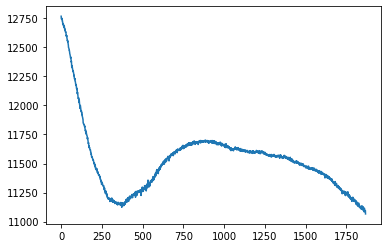

In [69]:
n_AOM = 1
Pvst = []

x1, x2 = 830, 850
y1, y2 = 125, 140

for i in range(n_AOM, len(tifstack), 5):
    img = np.array(tifstack[i][y1:y2, x1:x2])
    Total = np.sum(img)
    Pvst.append(Total)
    
n_pixels = len(img)*len(img[0])
ave_Pvst = [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

dev = 200 * (max(ave_Pvst)-min(ave_Pvst)) / (max(ave_Pvst)+min(ave_Pvst))
print("Power fluctuation (%): ", dev)

plt.plot(ave_Pvst[50::])
plt.show()

Power fluctuation (%):  24.4353511917317


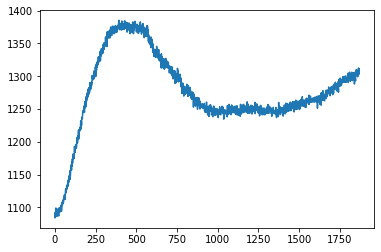

In [70]:
n_AOM = 2
Pvst = []

x1, x2 = 260, 268
y1, y2 = 407, 413

for i in range(n_AOM, len(tifstack), 5):
    img = np.array(tifstack[i][y1:y2, x1:x2])
    Total = np.sum(img)
    Pvst.append(Total)
    
n_pixels = len(img)*len(img[0])
ave_Pvst = [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

dev = 200 * (max(ave_Pvst)-min(ave_Pvst)) / (max(ave_Pvst)+min(ave_Pvst))
print("Power fluctuation (%): ", dev)

plt.plot(ave_Pvst[50::])
plt.show()

Power fluctuation (%):  22.6165571383162


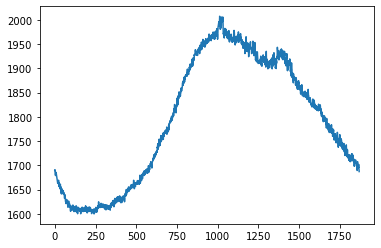

In [71]:
n_AOM = 3
Pvst = []

x1, x2 = 830, 845
y1, y2 = 130, 140

for i in range(n_AOM, len(tifstack), 5):
    img = np.array(tifstack[i][y1:y2, x1:x2])
    Total = np.sum(img)
    Pvst.append(Total)
    
n_pixels = len(img)*len(img[0])
ave_Pvst = [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

dev = 200 * (max(ave_Pvst)-min(ave_Pvst)) / (max(ave_Pvst)+min(ave_Pvst))
print("Power fluctuation (%): ", dev)

plt.plot(ave_Pvst[50::])
plt.show()

Power fluctuation (%):  28.752706389398515


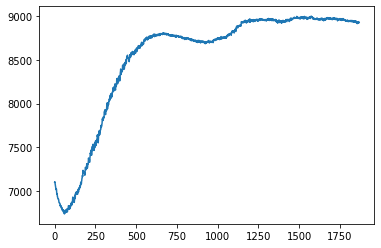

In [72]:
n_AOM = 4
Pvst = []

x1, x2 = 135, 150
y1, y2 = 265, 285

for i in range(n_AOM, len(tifstack), 5):
    img = np.array(tifstack[i][y1:y2, x1:x2])
    Total = np.sum(img)
    Pvst.append(Total)
    
n_pixels = len(img)*len(img[0])
ave_Pvst = [x / n_pixels for x in Pvst] ### Dividing all the elements by a number

dev = 200 * (max(ave_Pvst)-min(ave_Pvst)) / (max(ave_Pvst)+min(ave_Pvst))
print("Power fluctuation (%): ", dev)

plt.plot(ave_Pvst[50::])
plt.show()

## Cooling laser power fluctuation

In [73]:
import csv
datafile = "AndorImages\\Set4\\LaserPowers.csv"

has_header = True
with open(datafile, 'r', newline='') as f:
    reader = csv.reader(f)
    if has_header:
        header = reader.__next__()
    data = [row for row in reader]#[:5]
    f.close()

data = np.array(data,float).transpose()
# print(data)
rows,cols = data.shape

cooling_1Percent = data[0]
cooling_99Percent = data[1]
MOT_6th = data[2]

Power fluctuation (%):  6.570371344315267


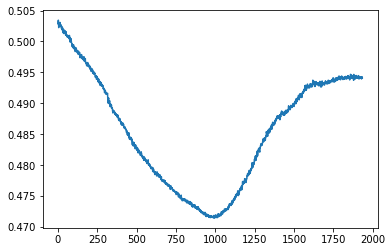

In [75]:
Data = cooling_1Percent
dev = 200 * (max(Data)-min(Data)) / (max(Data)+min(Data))
print("Power fluctuation (%): ", dev)

plt.plot(Data)
plt.show()

Power fluctuation (%):  5.827734244083062


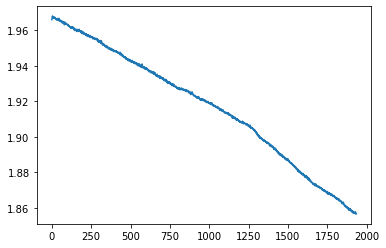

In [76]:
Data = cooling_99Percent
dev = 200 * (max(Data)-min(Data)) / (max(Data)+min(Data))
print("Power fluctuation (%): ", dev)

plt.plot(Data)
plt.show()

Power fluctuation (%):  7.520541717837198


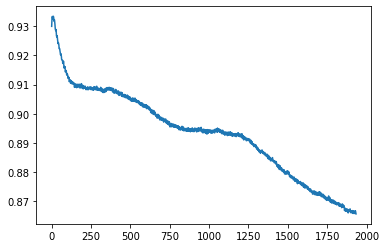

In [77]:
Data = MOT_6th
dev = 200 * (max(Data)-min(Data)) / (max(Data)+min(Data))
print("Power fluctuation (%): ", dev)

plt.plot(Data)
plt.show()